<a href="https://colab.research.google.com/github/Anjumammar/girls-scout-churn-prediction-/blob/main/girl_scout_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Churn Prediction

In [ ]:
##installing import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:

In [ ]:
data = pd.read_csv("/content/Churn data with flag.csv")
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,0,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
df1=data.copy()

In [ ]:
data.isnull().any()

customerID          False
tenure              False
PhoneService        False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [ ]:
data.shape

(7043, 21)

Data Clea

### Visualize missing values

In [ ]:
data[data["TotalCharges"] == ' ']


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,0,No,Two year,Yes,Bank transfer (automatic),52.55,,0,Female,...,Yes,Yes,No phone service,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,0,Yes,Two year,No,Mailed check,20.25,,0,Male,...,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
936,5709-LVOEQ,0,Yes,Two year,No,Mailed check,80.85,,0,Female,...,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,0,Yes,Two year,No,Mailed check,25.75,,0,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1340,1371-DWPAZ,0,No,Two year,No,Credit card (automatic),56.05,,0,Female,...,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,0,Yes,Two year,No,Mailed check,19.85,,0,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3826,3213-VVOLG,0,Yes,Two year,No,Mailed check,25.35,,0,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4380,2520-SGTTA,0,Yes,Two year,No,Mailed check,20.00,,0,Female,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5218,2923-ARZLG,0,Yes,One year,Yes,Mailed check,19.70,,0,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6670,4075-WKNIU,0,Yes,Two year,No,Mailed check,73.35,,0,Female,...,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No


In [ ]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

### There are 11 records with missing Total charges

In [ ]:
data[data["tenure"] == 0]

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,0,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,Female,...,Yes,Yes,No phone service,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,0,Yes,Two year,No,Mailed check,20.25,NaN,0,Male,...,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
936,5709-LVOEQ,0,Yes,Two year,No,Mailed check,80.85,NaN,0,Female,...,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,0,Yes,Two year,No,Mailed check,25.75,NaN,0,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1340,1371-DWPAZ,0,No,Two year,No,Credit card (automatic),56.05,NaN,0,Female,...,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,0,Yes,Two year,No,Mailed check,19.85,NaN,0,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3826,3213-VVOLG,0,Yes,Two year,No,Mailed check,25.35,NaN,0,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4380,2520-SGTTA,0,Yes,Two year,No,Mailed check,20.00,NaN,0,Female,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5218,2923-ARZLG,0,Yes,One year,Yes,Mailed check,19.70,NaN,0,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6670,4075-WKNIU,0,Yes,Two year,No,Mailed check,73.35,NaN,0,Female,...,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No


In [ ]:
data.drop(labels=data[data["tenure"] == 0].index, axis = 0, inplace = True)

In [ ]:
data.fillna(data["TotalCharges"].mean())


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,0,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.50,0,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,1,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


# Analysis 

In [ ]:
for i in data.columns:
    print(i, ": ", data[i].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  ['No' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
De

In [ ]:
data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

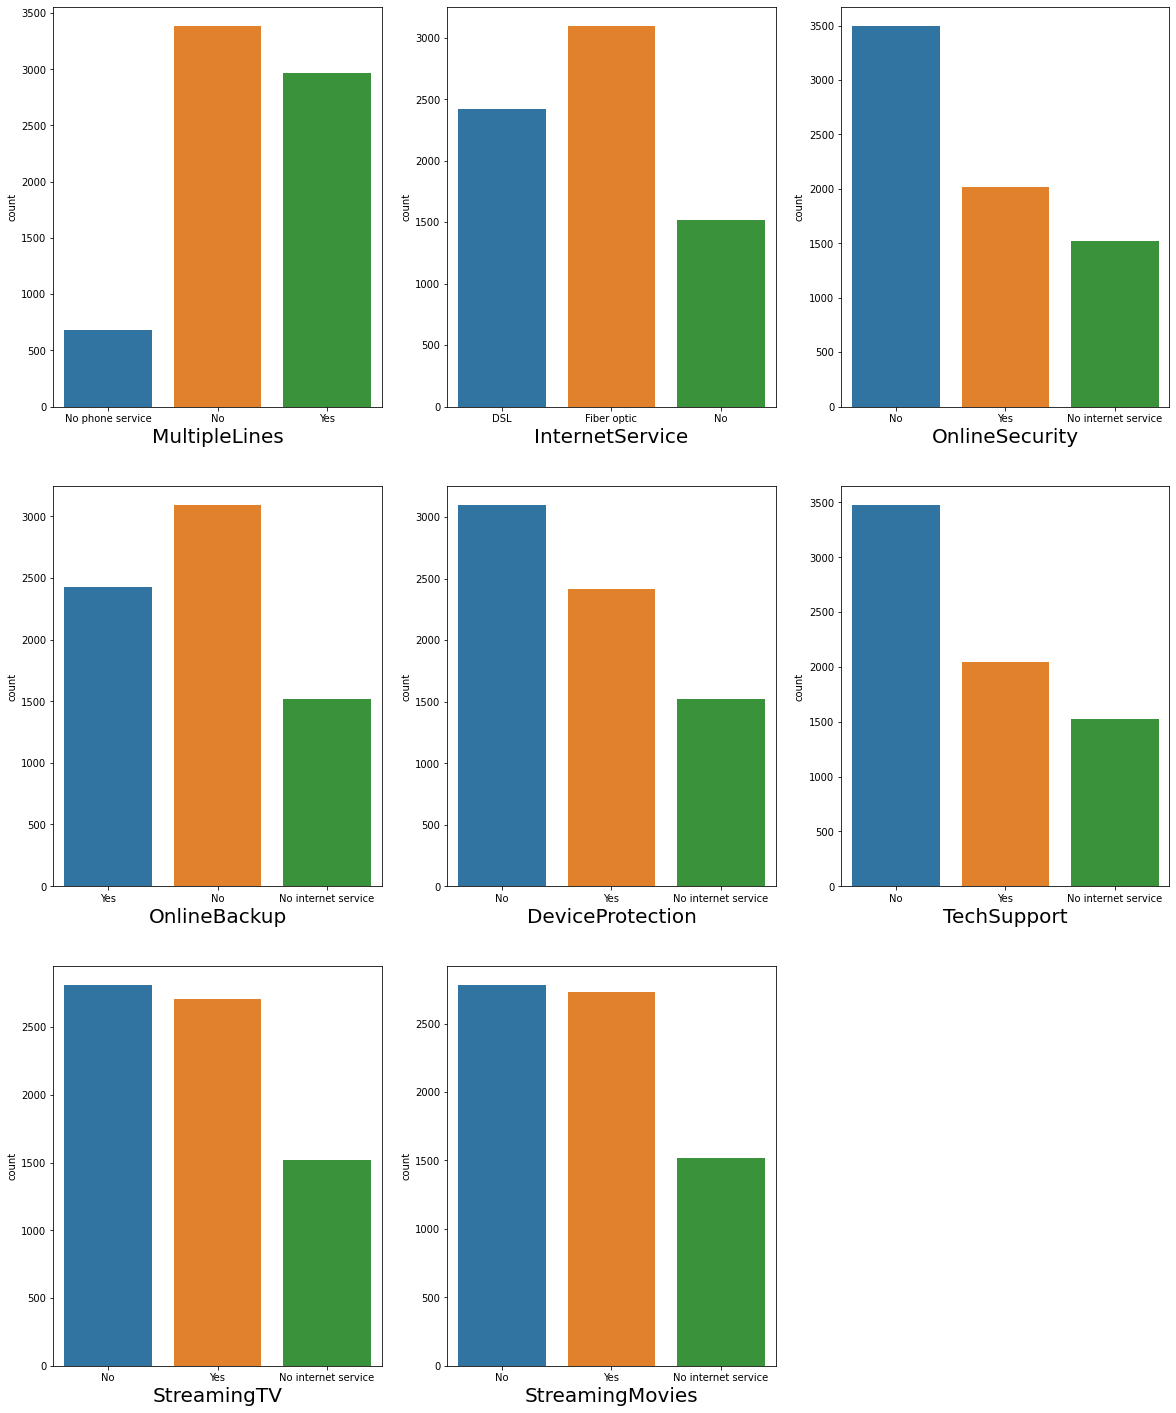

In [ ]:
# let's see how data is distributed for every column
x=[ 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

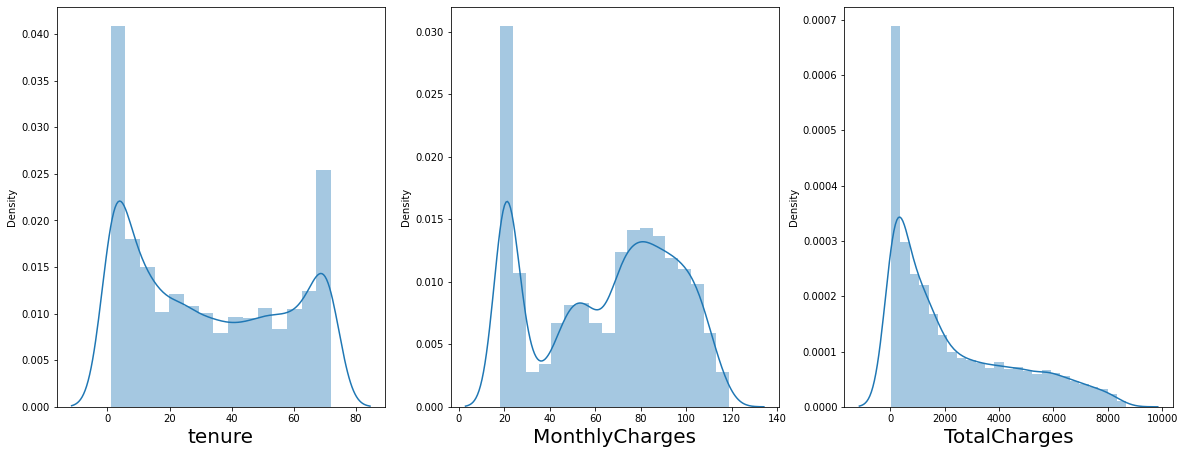

In [ ]:
y=['tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in y:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

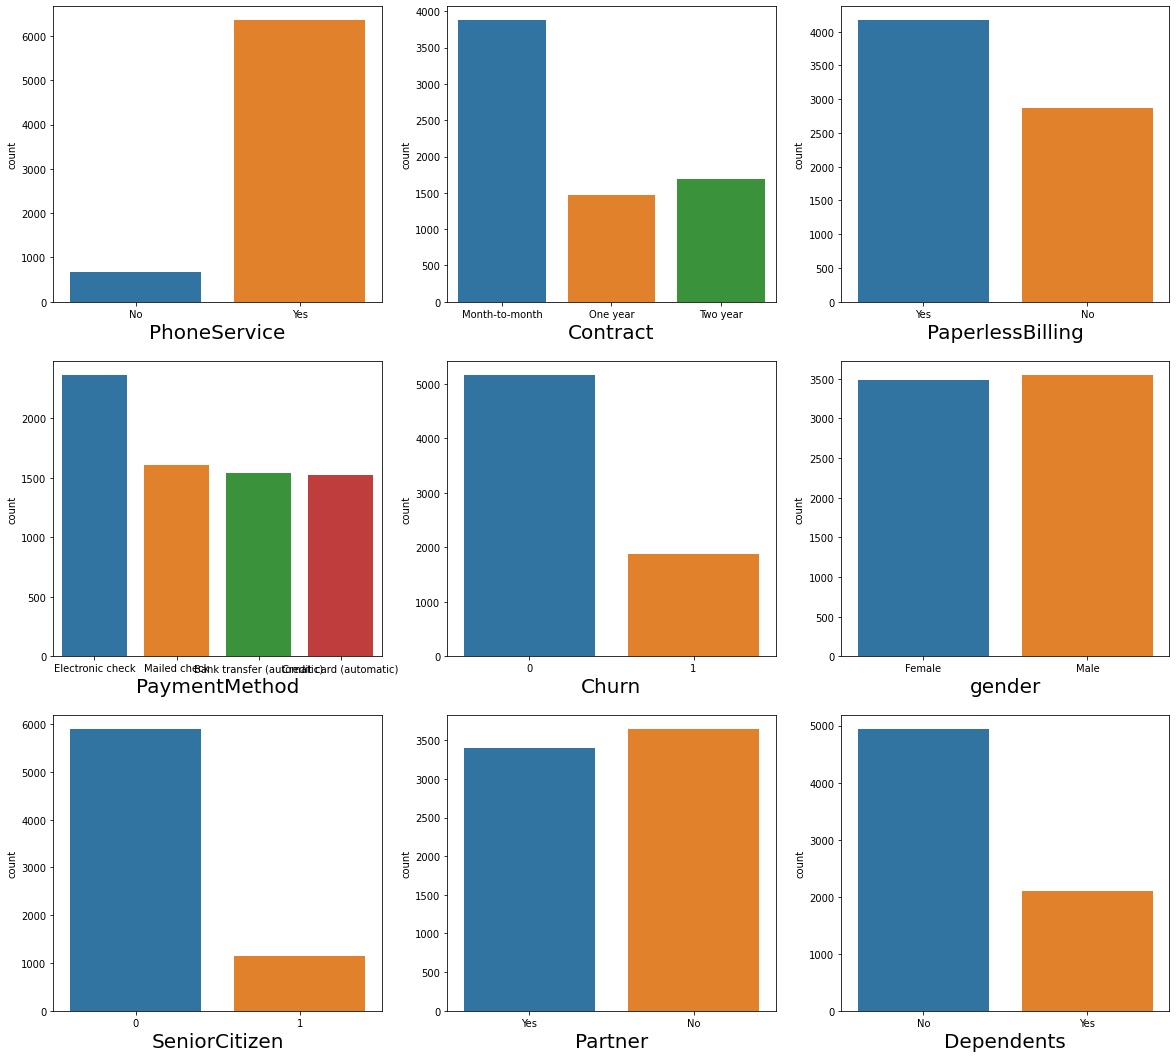

In [ ]:
k=['PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in k:
    if plotnumber<=12 :     # as there are 9 columns in the data
        ax = plt.subplot(4,3,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
##bivariate analysis

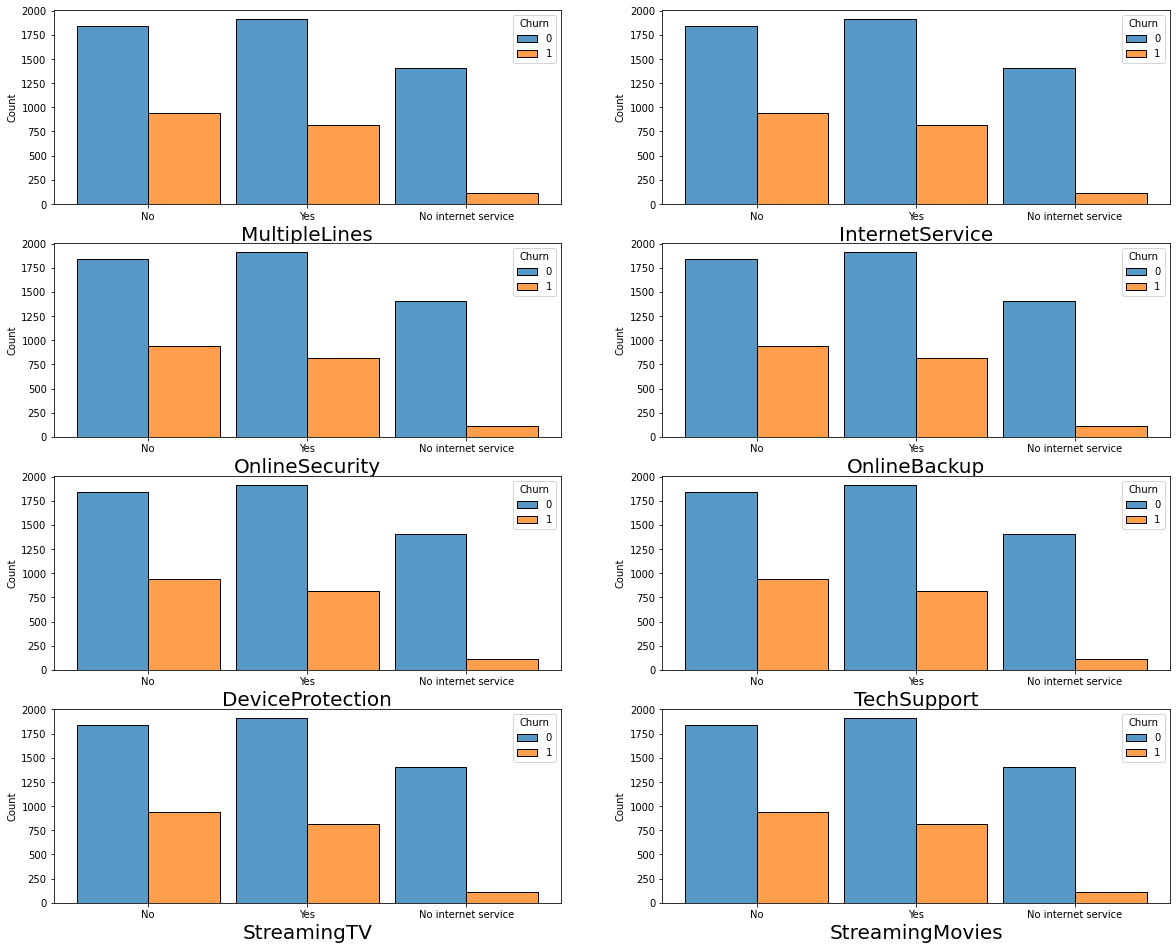

In [ ]:
 
x=[ 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=12 :     # as there are 9 columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sns.histplot(data=data, x=i, hue='Churn', multiple="dodge", shrink=0.9)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

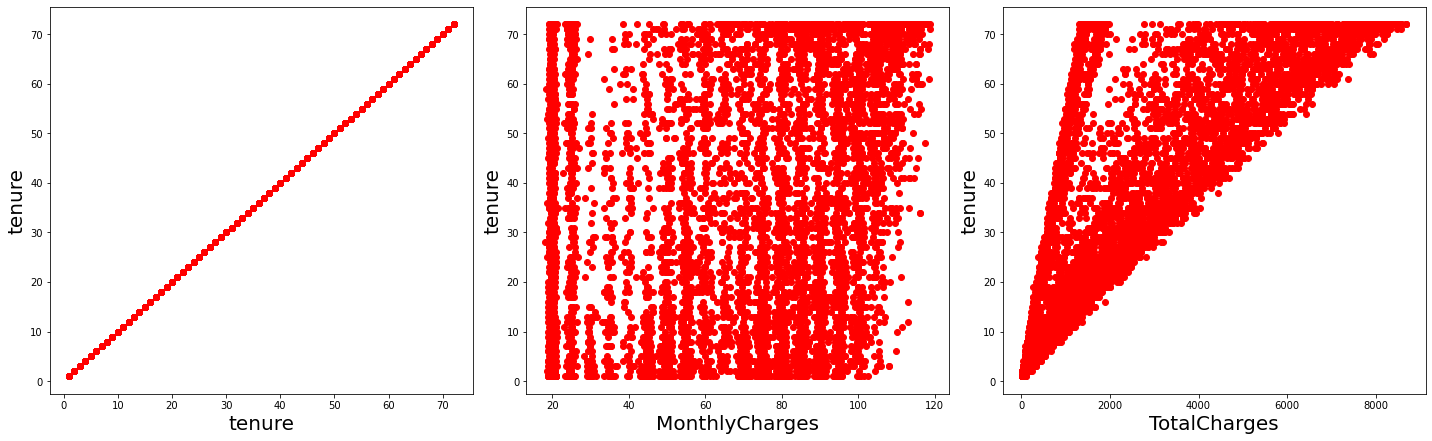

In [ ]:
#scatter plot
plt.figure(figsize = (20,30) , facecolor = 'white')
plotnumber = 1
for column in y :
    if plotnumber <= 15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(data[column],data['tenure']  ,c='red')
        plt.xlabel(column , fontsize = 20)
        plt.ylabel('tenure' , fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [ ]:
# from autoviz.AutoViz_Class import AutoViz_Class
# AV=AutoViz_Class()
# x=AV.AutoViz(
#     file_name
#               )

# **Feature Engineering**

In [ ]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
 

In [ ]:
data.SeniorCitizen.unique()

array([0, 1])

In [ ]:
data.SeniorCitizen = data.SeniorCitizen.map({0: "No", 1: "Yes"})

In [ ]:
data1=data.copy()

In [ ]:
data1.Churn=data1.Churn.map({'Yes':1,'No':0})

In [ ]:
data1.to_csv('preprocessed_customer_churn4.csv',index=None)

In [ ]:
data = data.drop(["customerID"], axis = 1)


In [ ]:
# !pip install autoviz

New customers are more likely to churn

##label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
obj=data.select_dtypes(include='object').columns
data.loc[:,obj]=data.loc[:,obj].apply(LabelEncoder().fit_transform)




In [ ]:
z1=data.to_csv('AVV1.csv')
file_name='/content/AVV1.csv'

In [ ]:
# !pip install autoviz

## quick view for transformation 
here if i select one variable which is correlated with churn and not much normally distribution
and if i do appropriate transformation then it becomes high correlated than before


In [ ]:
 corr=data.corr()['Churn'].sort_values(ascending=False)


In [ ]:
corr

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

#Feature transformation

null hypothesis-data is normal

Alternative Hypothesis-data is not normal

In [ ]:
from scipy import stats


In [ ]:
_,l=stats.boxcox(data['tenure'])
#lambda value before Transformation
print('lambda  :',l)

lambda  : 0.45712718949830217


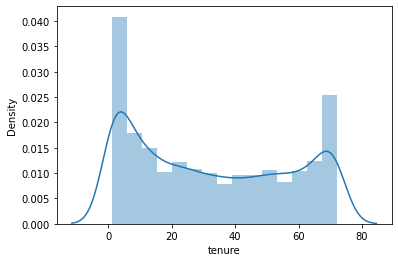

In [ ]:
 sns.distplot(data['tenure'])

In [ ]:
 data['tenure']=stats.boxcox(data['tenure'], lmbda=0.45, alpha=None, optimizer=None)

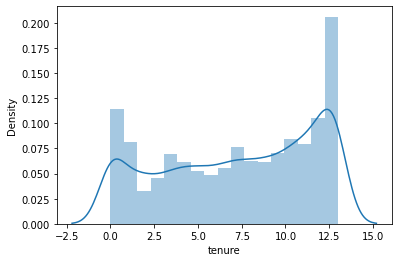

In [ ]:
 sns.distplot(data['tenure'])

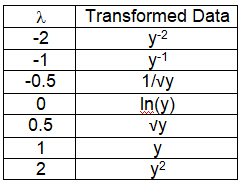

#Feature selection

In [ ]:
p=data.corr()['Churn'].sort_values(ascending=False)

In [ ]:
p

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.374368
Contract           -0.396150
Name: Churn, dtype: float64

In [ ]:
t=pd.DataFrame(p)
t.Churn=t.Churn.apply(lambda x:abs(x))
t.Churn=t.Churn.sort_values(ascending=False)

In [ ]:
t=t.sort_values(by='Churn',ascending=False)

In [ ]:

data=data[list(t.Churn.index[:11])]

In [ ]:
list(t.Churn.index[:11])

['Churn',
 'Contract',
 'tenure',
 'OnlineSecurity',
 'TechSupport',
 'TotalCharges',
 'OnlineBackup',
 'MonthlyCharges',
 'PaperlessBilling',
 'DeviceProtection',
 'Dependents']

In [ ]:
data.columns

Index(['Churn', 'Contract', 'tenure', 'OnlineSecurity', 'TechSupport',
       'TotalCharges', 'OnlineBackup', 'MonthlyCharges', 'PaperlessBilling',
       'DeviceProtection', 'Dependents'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   Contract          7032 non-null   int64  
 2   tenure            7032 non-null   float64
 3   OnlineSecurity    7032 non-null   int64  
 4   TechSupport       7032 non-null   int64  
 5   TotalCharges      7032 non-null   float64
 6   OnlineBackup      7032 non-null   int64  
 7   MonthlyCharges    7032 non-null   float64
 8   PaperlessBilling  7032 non-null   int64  
 9   DeviceProtection  7032 non-null   int64  
 10  Dependents        7032 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 917.3 KB


In [ ]:
vals=data.corr().index
vals2=list(vals)
combin=[]
for i in vals2[1:-1]:
    for j in vals2[1:-1]:
        if j != i and abs(data.corr()[i][j]) > 0.6 and data.corr()[i][j] not in combin:
            print("Correlation between " + i + " and " +j + ": "+  str(data.corr()[i][j]))
            combin.append(data.corr()[i][j]) #Avoid repeating combinations

Correlation between Contract and tenure: 0.6417166239908735
Correlation between tenure and TotalCharges: 0.79114720671579
Correlation between TotalCharges and MonthlyCharges: 0.6510648032262019


In [ ]:
combin


[0.6417166239908735, 0.79114720671579, 0.6510648032262019]

In [ ]:
data.shape

(7032, 11)

In [ ]:
t


,Churn
Churn,1.000000
Contract,0.396150
tenure,0.374368
OnlineSecurity,0.289050
TechSupport,0.282232
TotalCharges,0.199484
OnlineBackup,0.195290
MonthlyCharges,0.192858
PaperlessBilling,0.191454
DeviceProtection,0.177883


In [ ]:
data.drop(['TotalCharges','tenure'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['Churn', 'Contract', 'OnlineSecurity', 'TechSupport', 'OnlineBackup',
       'MonthlyCharges', 'PaperlessBilling', 'DeviceProtection', 'Dependents'],
      dtype='object')

In [ ]:
# variance = pd.DataFrame(np.var(data)).reset_index()
# variance.columns = ["FEILD","VARIANCE"]
# variance.VARIANCE = variance.VARIANCE.round(2)
# variance
 
# variance = variance[variance.VARIANCE>=0.10]
# data= data[list(variance.FEILD)]
# data.shape


 

In [ ]:
data.columns

Index(['Churn', 'Contract', 'OnlineSecurity', 'TechSupport', 'OnlineBackup',
       'MonthlyCharges', 'PaperlessBilling', 'DeviceProtection', 'Dependents'],
      dtype='object')

In [ ]:
data['customerID']=data1.customerID

In [ ]:
X = data.drop(columns = "Churn")
y = data["Churn"].values

#splitting into train test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4, stratify =y)

In [ ]:
X_train1=X_train.copy()
X_test1=X_test.copy()

In [ ]:
X_train.drop('customerID',axis=1,inplace=True)
X_test.drop('customerID',axis=1,inplace=True)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE(random_state = 10)
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

The features need standard scaling as all of them are distributed over different range values 

In [ ]:
data.columns

Index(['Churn', 'Contract', 'OnlineSecurity', 'TechSupport', 'OnlineBackup',
       'MonthlyCharges', 'PaperlessBilling', 'DeviceProtection', 'Dependents',
       'customerID'],
      dtype='object')

In [ ]:
# # Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

# cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
# cat_cols_le = list(set(X_train.columns)- set(col) - set(cat_cols_ohe)) #those that need label encoding

# print(cat_cols_le)

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

 
# from sklearn.pipeline import Pipeline

In [ ]:

# steps = [('scaler', StandardScaler()),
          
#          ("ada boost", AdaBoostClassifier(learning_rate=0.01, n_estimators=420))
#         ]
# pipeline = Pipeline(steps)
# pipeline.fit(X_train, y_train)

# # check score on train data
# pipeline.score(X_train, y_train)

In [ ]:
data.duplicated().sum()

0

#Selecting Algorithm

In [ ]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))
# models.append(("Voting Classifier",  VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()), ('abc',  AdaBoostClassifier())], voting='soft')))

## Evaluating the model Results

In [ ]:
from sklearn.model_selection import KFold

## 2nd Iteration

In [ ]:
# Logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#SVC

classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

#knn

classifier3 = KNeighborsClassifier(n_neighbors=22, metric="minkowski", p=2)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)


#Kernel SVM
classifier4 = SVC(kernel="rbf", random_state =0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)


#Naive Bayes
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)

#Decision tree
classifier6 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)

#Random Forest

classifier7 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)

#Adaboost
classifier8 = AdaBoostClassifier()
classifier8.fit(X_train, y_train)
y_pred8 = classifier8.predict(X_test)

#Gradient Boost
classifier9 = GradientBoostingClassifier()


classifier9.fit(X_train, y_train)
y_pred9 = classifier9.predict(X_test)

In [ ]:
#: Model Evaluation

In [ ]:
#  def k_fold_cross_validation(classifier_name, name):
#     accuracies = cross_val_score(estimator=classifier_name,
#                             X=X_train, y=y_train,scoring='roc_auc', cv =10)
#     print(name, "accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

In [ ]:
# ROC Curve

def ROC_curve(classifier_, name, y_pred_):
    classifier_.fit(X_train, y_train) 
    probs = classifier_.predict_proba(X_test) 
    probs = probs[:, 1] 
    classifier_roc_auc = roc_auc_score(y_test, probs )
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_.predict_proba(X_test)[:,1])
    plt.figure(figsize=(14, 6))

    label_ = name + '(area = %0.2f)' % classifier_roc_auc
    # Plot Adaboost ROC
    plt.plot(rf_fpr, rf_tpr, 
    label=label_)
    # Plot Base Rate ROC
    plt.plot([0,1], [0,1],label='Base Rate' 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium", 
    fontfamily = "sans-serif")

    plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium", 
    fontfamily = "sans-serif")

    plt.title('ROC Graph \n',horizontalalignment="center", 
    fontstyle = "normal", fontsize = "22", 
    fontfamily = "sans-serif")

    plt.legend(loc="lower right", fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.show()
    
  

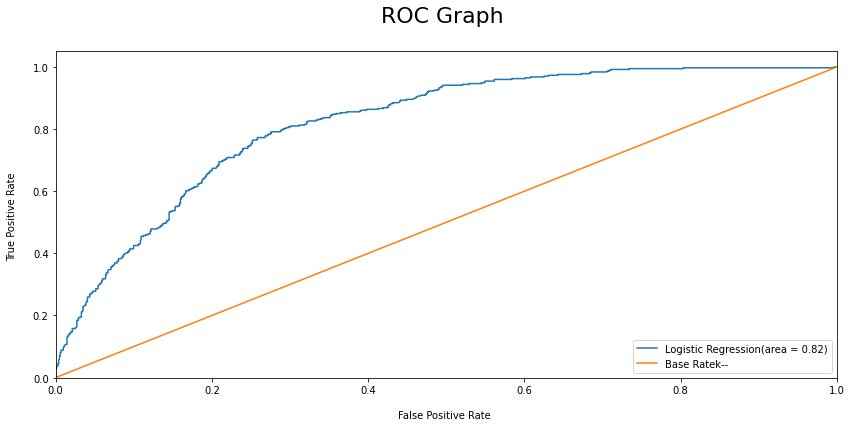

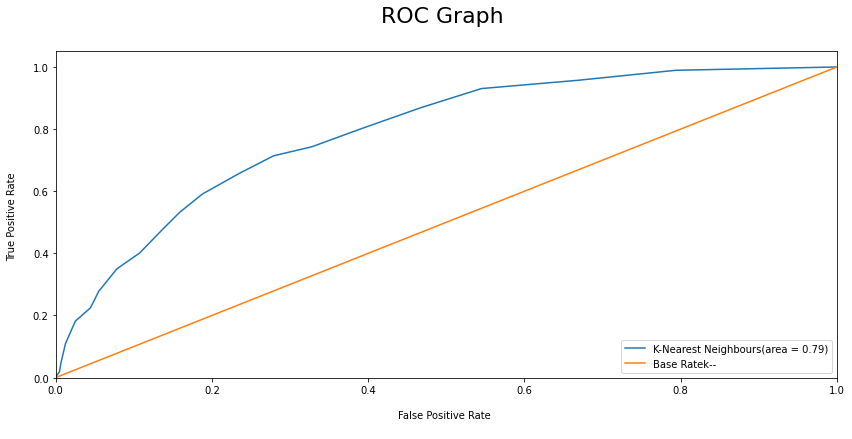

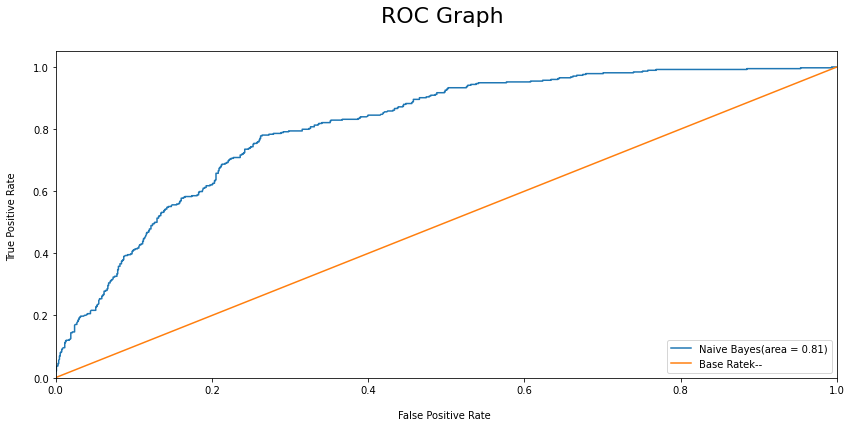

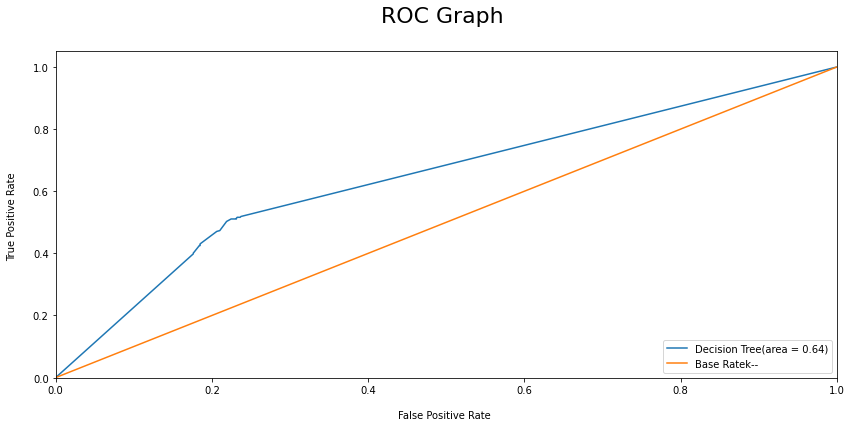

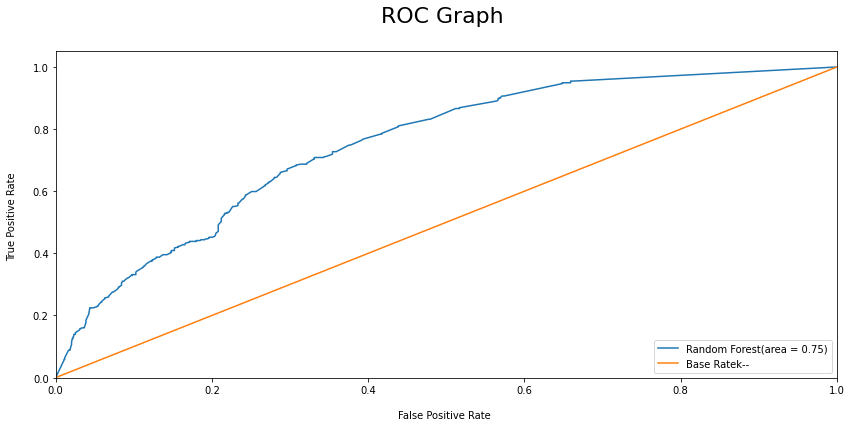

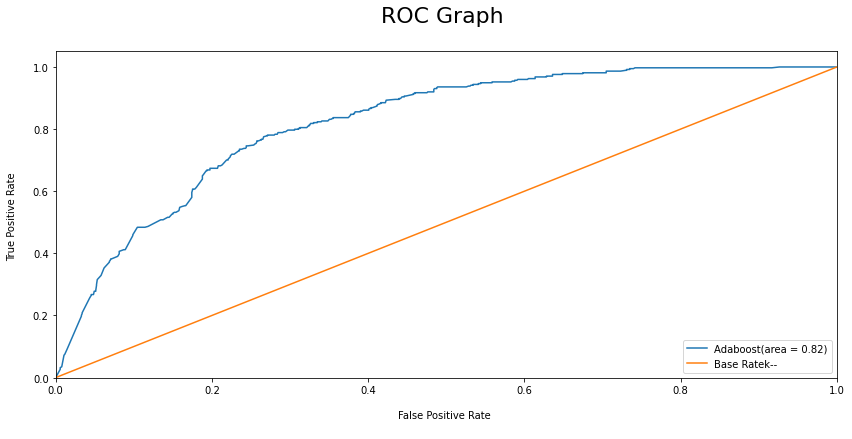

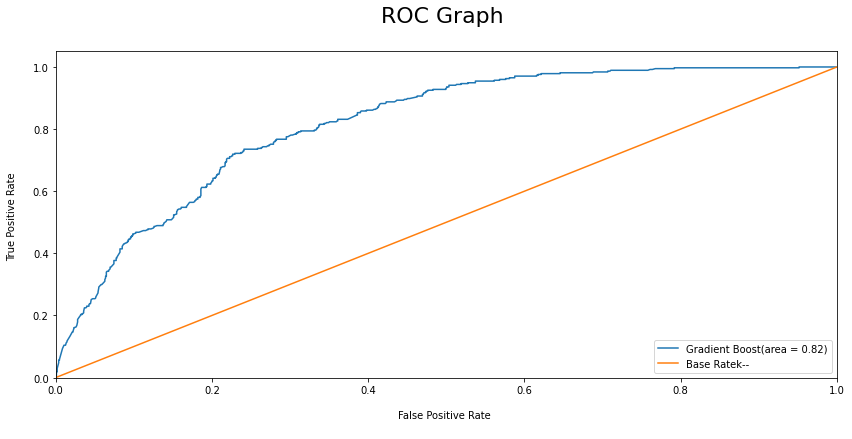

In [ ]:
preds = [y_pred, y_pred3,  y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9]
classifiers = [classifier , classifier3, classifier5, classifier6, classifier7,
             classifier8, classifier9]
model_names_ = ["Logistic Regression",  "K-Nearest Neighbours","Naive Bayes",
               "Decision Tree", "Random Forest", "Adaboost", "Gradient Boost"]

for i, j, k in zip(classifiers, model_names_, preds):
    ROC_curve(i, j, k) 

we can go for AdaBoost and GradientBoosting with HyperParameter Tunning  

In [ ]:
# Cross validation

from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGen(functions, scr, X_train = X, y_train = y, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [ ]:
# cvD = cvDictGen(classifiers, scr = 'roc_auc')
# cvD

## Predicting feature importance

In [ ]:
# Gradient Boost
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier9.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
0,Churn,0.548304
4,OnlineBackup,0.190589
1,Contract,0.112278
2,OnlineSecurity,0.075024
3,TechSupport,0.038702
5,MonthlyCharges,0.016922
6,PaperlessBilling,0.012181
7,DeviceProtection,0.006000
8,Dependents,NaN
9,customerID,NaN


In [ ]:
# Ada boost classifier
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier8.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
4,OnlineBackup,0.66
0,Churn,0.14
1,Contract,0.04
2,OnlineSecurity,0.04
3,TechSupport,0.04
6,PaperlessBilling,0.04
5,MonthlyCharges,0.02
7,DeviceProtection,0.02
8,Dependents,NaN
9,customerID,NaN


In [ ]:
X_train

array([[-0.82739079, -0.91856405, -0.92338234, ..., -1.20545352,
        -1.02580311, -0.66117221],
       [ 1.58092651,  1.4115026 ,  1.40316891, ...,  0.8295633 ,
         1.25083626,  1.51246525],
       [-0.82739079, -0.91856405, -0.92338234, ...,  0.8295633 ,
        -1.02580311, -0.66117221],
       ...,
       [-0.82739079, -0.91856405, -0.92338234, ..., -1.20545352,
        -1.02580311,  1.51246525],
       [ 0.37676786,  1.4115026 , -0.92338234, ..., -1.20545352,
         1.25083626, -0.66117221],
       [-0.82739079, -0.91856405, -0.92338234, ...,  0.8295633 ,
         1.25083626, -0.66117221]])

## Hyper Parameter tuning

## Using Randomized search CV

In [ ]:
#Ada boost

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
adaHyperParams = {'n_estimators': [10,50,100,200,420], "learning_rate":  [0.001, 0.01, 0.1, 0.3]}
gridSearchAda = RandomizedSearchCV(estimator = classifier8, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc') # other option accuracy
gridSearchAda.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.3],
                                        'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   scoring='roc_auc')

In [ ]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 100, 'learning_rate': 0.1}, 0.8232429324544285)

In [ ]:
X_test


array([[-0.82739079, -0.91856405, -0.92338234, ...,  0.8295633 ,
        -1.02580311, -0.66117221],
       [-0.82739079, -0.91856405, -0.92338234, ...,  0.8295633 ,
        -1.02580311, -0.66117221],
       [-0.82739079, -0.91856405, -0.92338234, ...,  0.8295633 ,
        -1.02580311, -0.66117221],
       ...,
       [ 1.58092651,  1.4115026 ,  1.40316891, ...,  0.8295633 ,
         1.25083626,  1.51246525],
       [-0.82739079, -0.91856405,  1.40316891, ...,  0.8295633 ,
        -1.02580311, -0.66117221],
       [ 0.37676786, -0.91856405,  1.40316891, ...,  0.8295633 ,
        -1.02580311, -0.66117221]])

In [ ]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [ ]:
# Getting the score AdaBoost
test_labels = bestAdaModFitted.predict_proba(X_test)[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8232459841280524

In [ ]:
gridSearchAda.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

### Gradient Boost

In [ ]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = classifier9, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
# Fitting the model
gridSearchGB.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5ab41177d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5ab4117dd0>},
                   scoring='roc_auc')

In [ ]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'deviance', 'max_depth': 1, 'n_estimators': 282}, 0.8237612056329816)

In [ ]:
bestGBModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [ ]:
# Getting the score AdaBoost
test_labels_GB = bestGBModFitted.predict_proba(np.array(X_test))[:,1]
roc_auc_score(y_test,test_labels_GB , average = 'macro', sample_weight = None).round(3)

0.822

In [ ]:
test_labels_GB1 = bestGBModFitted.predict(X_test)

In [ ]:
  gridSearchGB.best_estimator_

GradientBoostingClassifier(max_depth=1, n_estimators=282)

In [ ]:
from sklearn.metrics import f1_score,fbeta_score

In [ ]:
fbeta_score(y_test,test_labels_GB1,beta=2)

0.4980414101846671

#DECREASE FALSE NEGATIVE

In [ ]:
import numpy as np
 

lets define a function for checking false negative

In [ ]:
def predict_threshold (model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(gridSearchGB,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))
    print(fbeta_score(y_test,y_predict,beta=2))
    print(recall_score(y_test,y_predict))


Threshold : 0.0
[[   0 1033]
 [   0  374]]
0.644161212538753
1.0
Threshold : 0.1
[[490 543]
 [ 22 352]]
0.7360936846507737
0.9411764705882353
Threshold : 0.2
[[648 385]
 [ 59 315]]
0.7172131147540982
0.8422459893048129
Threshold : 0.30000000000000004
[[750 283]
 [ 84 290]]
0.7008216529724505
0.7754010695187166
Threshold : 0.4
[[819 214]
 [122 252]]
0.6422018348623852
0.6737967914438503
Threshold : 0.5
[[920 113]
 [196 178]]
0.4980414101846671
0.47593582887700536
Threshold : 0.6000000000000001
[[990  43]
 [289  85]]
0.2616995073891626
0.22727272727272727
Threshold : 0.7000000000000001
[[1033    0]
 [ 374    0]]
0.0
0.0
Threshold : 0.8
[[1033    0]
 [ 374    0]]
0.0
0.0
Threshold : 0.9
[[1033    0]
 [ 374    0]]
0.0
0.0


In [ ]:
y_predict_th3 = np.where(bestGBModFitted.predict_proba(X_test)[:,1]>0.1,1,0) # Threshold is 0.1


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test,y_predict_th3)

0.9411764705882353

In [ ]:
tpr,fpr,thresholds = roc_curve(y_test,test_labels_GB)

In [ ]:
thresholds


array([1.67619892, 0.67619892, 0.66603277, 0.65539169, 0.64487639,
       0.64455534, 0.62797249, 0.62794539, 0.62582124, 0.61584679,
       0.61358921, 0.60886708, 0.60587254, 0.59751745, 0.59444261,
       0.59119107, 0.58525248, 0.58278374, 0.57997225, 0.57963078,
       0.57493888, 0.57250277, 0.56545677, 0.56360328, 0.56325852,
       0.56207689, 0.5598117 , 0.54934474, 0.54774404, 0.54552822,
       0.5431685 , 0.5401295 , 0.53893651, 0.5327438 , 0.53100881,
       0.53030833, 0.53026259, 0.52862668, 0.52612562, 0.52228558,
       0.52225663, 0.51581447, 0.51506499, 0.51071174, 0.50702392,
       0.5068627 , 0.50449421, 0.49749906, 0.49546653, 0.49511617,
       0.49468282, 0.49440224, 0.4902024 , 0.48863787, 0.48701158,
       0.48544666, 0.47865615, 0.47785581, 0.4754704 , 0.47245205,
       0.47176276, 0.46910343, 0.46446272, 0.46436792, 0.46268194,
       0.4626531 , 0.46263513, 0.46193601, 0.457767  , 0.4569551 ,
       0.4551385 , 0.45391918, 0.44767645, 0.4460609 , 0.44532

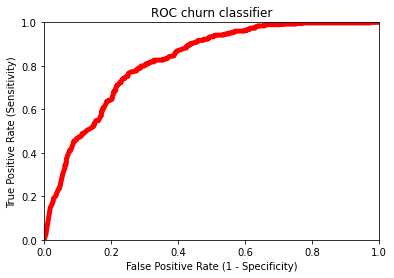

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, gridSearchGB.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC churn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()